In [1]:
#Basic libraries
import numpy as np
import pandas as pd
# Visualization libraries
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

## loading the labels data and understanding it

In [14]:
train_labels = pd.read_csv("train_label.tsv",sep="\t")
train_labels.head()

Unnamed: 0     id    sample_type          X_primary_disease
0      S1343  S1343  Primary Tumor  breast invasive carcinoma
1      S1344  S1344  Primary Tumor  breast invasive carcinoma
2      S1345  S1345  Primary Tumor  breast invasive carcinoma
3      S1348  S1348  Primary Tumor  breast invasive carcinoma
4       S135   S135  Primary Tumor  breast invasive carcinoma

In [15]:
train_labels['id'].equals(train_labels['Unnamed: 0'])

True

Confirming the column Unnamed: 0 and id values are exactly same.
 
Interpretation: Yes, they are same, for further study, we can use id coulum

so, let's drop "Unamed: 0"


In [16]:
train_labels.drop('Unnamed: 0', axis=1,inplace= True)
train_labels.head()

id    sample_type          X_primary_disease
0  S1343  Primary Tumor  breast invasive carcinoma
1  S1344  Primary Tumor  breast invasive carcinoma
2  S1345  Primary Tumor  breast invasive carcinoma
3  S1348  Primary Tumor  breast invasive carcinoma
4   S135  Primary Tumor  breast invasive carcinoma

In [17]:
train_labels.shape

(1514, 3)

### Finding the missing values

In [18]:
train_labels.isnull().sum().sort_values(ascending = False)

id                   0
sample_type          0
X_primary_disease    0
dtype: int64

Interpretation: There are no missing data. Hence, no need of any imputation

In [19]:
train_labels['sample_type'].unique()

array(['Primary Tumor'], dtype=object)

Interpretation: only one unique value is present. Hence we can ignore this

In [20]:
train_labels['X_primary_disease'].unique()

array(['breast invasive carcinoma', 'lung squamous cell carcinoma',
       'lung adenocarcinoma'], dtype=object)

In [21]:
train_labels['X_primary_disease'].value_counts()

breast invasive carcinoma       897
lung adenocarcinoma             315
lung squamous cell carcinoma    302
Name: X_primary_disease, dtype: int64

<Axes: xlabel='X_primary_disease', ylabel='count'>

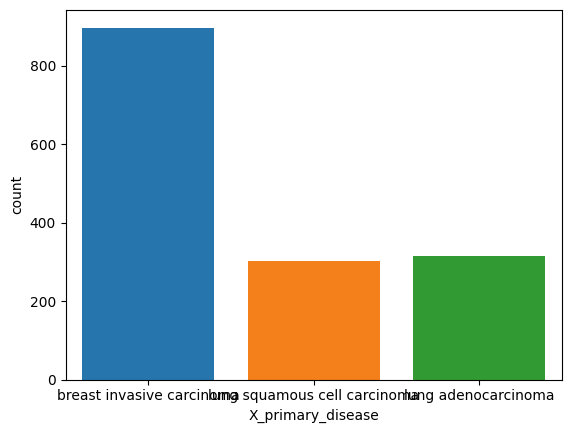

In [11]:
sns.countplot(x= train_labels['X_primary_disease'], saturation=0.90)

In [12]:
target_counts=train_labels['X_primary_disease'].value_counts().to_dict()
target_counts

{'breast invasive carcinoma': 897,
 'lung adenocarcinoma': 315,
 'lung squamous cell carcinoma': 302}

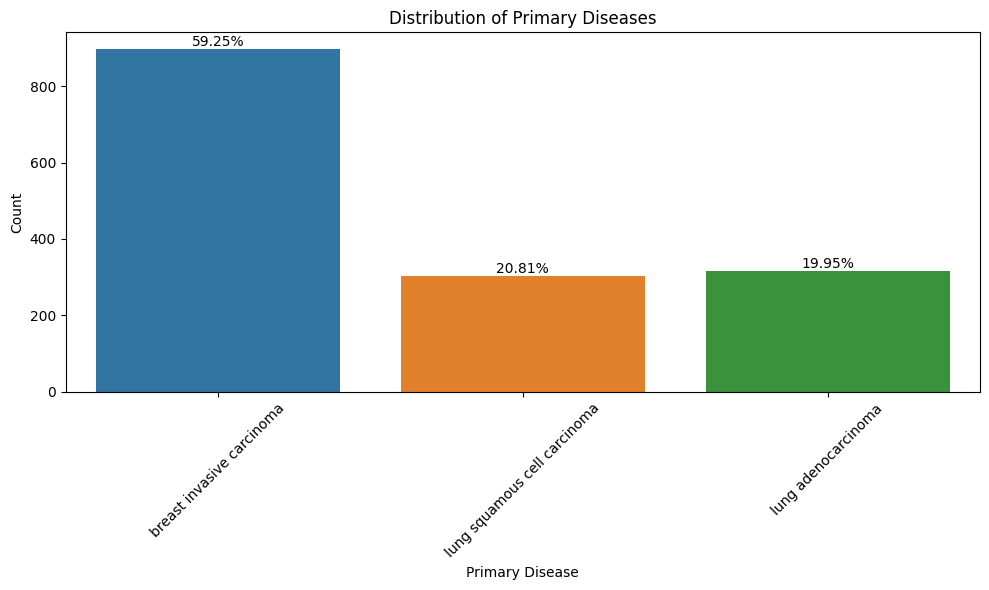

In [13]:
# Calculate total samples
total_samples = sum(target_counts.values())

# Calculate percentages
percentages = [(count / total_samples) * 100 for count in target_counts.values()]

# Create a countplot with Seaborn
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=train_labels, x='X_primary_disease')

# Adding percentage labels to the bars
for i, p in enumerate(ax.patches):
    percentage = percentages[i]
    ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.xlabel('Primary Disease')
plt.ylabel('Count')
plt.title('Distribution of Primary Diseases')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

### Understanding our target varibale:

* we have 3 types of cancers, i.e breast invasive carcinoma, lung squamous cell carcinoma, lung adenocarcinoma. 
* 59.25% of data belongs to single category i.e breast invasive carcinoma, lung squamous cell carcinoma 20.81% and 19.25% lung adenocarcinoma. 

Interpretation: Data is unbalance as more than half of data belongs to one cateogry. 


# Loading training data

In [4]:
train_data = pd.read_csv("train_data.tsv",sep="\t")
train_data.head()

Unnamed: 0  S1343  S1344  S1345  S1348   S135  S1353  S1354  S1355  S1356  \
0       A1BG   6.86   7.65   7.45   6.84   7.67   5.12   7.88   6.76   8.19   
1       A1CF   0.51   0.50   0.00   0.00   0.55   0.34   0.00   0.00   0.00   
2        A2M  12.27  13.95  13.86  13.55  14.80  13.21  13.30  14.00  13.72   
3      A2ML1  12.04   5.07   2.47   1.52   7.57   7.58   1.08   1.11   2.01   
4     A4GALT   6.74   9.18   8.59   6.35   8.88   6.87   6.53   8.34   9.55   

   ...   S990   S991   S992   S993   S994   S995   S996   S997   S998   S999  
0  ...   6.95   7.08   9.20   6.83   4.79   6.10   6.81   6.84   6.45   5.63  
1  ...   0.00   0.00   0.00   3.64   0.00   0.00   0.66   0.00   0.00   0.00  
2  ...  12.97  13.59  12.73  15.77  12.94  16.86  15.99  13.54  14.34  14.40  
3  ...   7.71   2.14   1.09   1.62  10.39   7.10   3.73   9.10   2.51   6.17  
4  ...   7.24   6.33   7.59   9.88   7.61   7.79   8.30   9.69   8.69   9.89  

[5 rows x 1515 columns]

In [5]:
train_data.isnull().sum().sort_values(ascending = False)

Unnamed: 0    0
S540          0
S549          0
S548          0
S547          0
             ..
S1991         0
S1990         0
S199          0
S1989         0
S999          0
Length: 1515, dtype: int64

### shape transformation

in our study, gene names will be the features hence we need to transpose the data and set the index to form data shape similar to our train labels data 

In [6]:
train_data_transpose = train_data.T

In [7]:
train_data_transpose.head()

0     1      2      3       4      5     6     7      8      \
Unnamed: 0  A1BG  A1CF    A2M  A2ML1  A4GALT  A4GNT  AAAS  AACS  AADAC   
S1343       6.86  0.51  12.27  12.04    6.74   0.89   9.5  10.2    0.0   
S1344       7.65   0.5  13.95   5.07    9.18    0.0  9.55  9.45   5.03   
S1345       7.45   0.0  13.86   2.47    8.59    0.5  9.75  9.93   0.87   
S1348       6.84   0.0  13.55   1.52    6.35    0.0  9.38  9.56    0.0   

              9      ...   16330  16331 16332 16333  16334   16335   16336  \
Unnamed: 0  AADACL2  ...  ZWILCH  ZWINT  ZXDA  ZXDB   ZXDC  ZYG11A  ZYG11B   
S1343           0.0  ...    8.87   9.99  5.19  7.86  10.04    8.25     9.4   
S1344           0.0  ...    8.48    9.3  5.51  8.26  10.06     5.7    9.34   
S1345           0.0  ...    8.36   7.78  5.45  8.39   9.95     5.5    9.28   
S1348           0.0  ...    8.65   8.28   6.7  9.46  10.71    6.78   10.62   

            16337  16338  16339  
Unnamed: 0    ZYX  ZZEF1   ZZZ3  
S1343        11.3   10.7   9.35  
S1344       12.98  10.21   9.39  
S1345       13.72  10.28   9.67  
S1348       11.14  10.79  10.42  

[5 rows x 16340 columns]

In [8]:
train_data_transpose.rename(columns=train_data_transpose.iloc[0],inplace = True)
train_data_transpose.head()

A1BG  A1CF    A2M  A2ML1  A4GALT  A4GNT  AAAS  AACS  AADAC  \
Unnamed: 0  A1BG  A1CF    A2M  A2ML1  A4GALT  A4GNT  AAAS  AACS  AADAC   
S1343       6.86  0.51  12.27  12.04    6.74   0.89   9.5  10.2    0.0   
S1344       7.65   0.5  13.95   5.07    9.18    0.0  9.55  9.45   5.03   
S1345       7.45   0.0  13.86   2.47    8.59    0.5  9.75  9.93   0.87   
S1348       6.84   0.0  13.55   1.52    6.35    0.0  9.38  9.56    0.0   

            AADACL2  ...  ZWILCH  ZWINT  ZXDA  ZXDB   ZXDC  ZYG11A  ZYG11B  \
Unnamed: 0  AADACL2  ...  ZWILCH  ZWINT  ZXDA  ZXDB   ZXDC  ZYG11A  ZYG11B   
S1343           0.0  ...    8.87   9.99  5.19  7.86  10.04    8.25     9.4   
S1344           0.0  ...    8.48    9.3  5.51  8.26  10.06     5.7    9.34   
S1345           0.0  ...    8.36   7.78  5.45  8.39   9.95     5.5    9.28   
S1348           0.0  ...    8.65   8.28   6.7  9.46  10.71    6.78   10.62   

              ZYX  ZZEF1   ZZZ3  
Unnamed: 0    ZYX  ZZEF1   ZZZ3  
S1343        11.3   10.7   9.35  
S1344       12.98  10.21   9.39  
S1345       13.72  10.28   9.67  
S1348       11.14  10.79  10.42  

[5 rows x 16340 columns]

In [9]:
train_data_transpose.drop(train_data_transpose.index[0], inplace = True)
train_data_transpose.head()

A1BG  A1CF    A2M  A2ML1 A4GALT A4GNT  AAAS   AACS AADAC AADACL2  ...  \
S1343  6.86  0.51  12.27  12.04   6.74  0.89   9.5   10.2   0.0     0.0  ...   
S1344  7.65   0.5  13.95   5.07   9.18   0.0  9.55   9.45  5.03     0.0  ...   
S1345  7.45   0.0  13.86   2.47   8.59   0.5  9.75   9.93  0.87     0.0  ...   
S1348  6.84   0.0  13.55   1.52   6.35   0.0  9.38   9.56   0.0     0.0  ...   
S135   7.67  0.55   14.8   7.57   8.88  0.55  9.27  10.01  1.91     0.0  ...   

      ZWILCH  ZWINT  ZXDA  ZXDB   ZXDC ZYG11A ZYG11B    ZYX  ZZEF1   ZZZ3  
S1343   8.87   9.99  5.19  7.86  10.04   8.25    9.4   11.3   10.7   9.35  
S1344   8.48    9.3  5.51  8.26  10.06    5.7   9.34  12.98  10.21   9.39  
S1345   8.36   7.78  5.45  8.39   9.95    5.5   9.28  13.72  10.28   9.67  
S1348   8.65   8.28   6.7  9.46  10.71   6.78  10.62  11.14  10.79  10.42  
S135    8.73  10.13  5.43  8.44   9.51   6.59   9.25   12.5   9.95   9.42  

[5 rows x 16340 columns]

In [10]:

train_data_transpose.reset_index(inplace = True)
train_data_transpose.head()

index  A1BG  A1CF    A2M  A2ML1 A4GALT A4GNT  AAAS   AACS AADAC  ...  \
0  S1343  6.86  0.51  12.27  12.04   6.74  0.89   9.5   10.2   0.0  ...   
1  S1344  7.65   0.5  13.95   5.07   9.18   0.0  9.55   9.45  5.03  ...   
2  S1345  7.45   0.0  13.86   2.47   8.59   0.5  9.75   9.93  0.87  ...   
3  S1348  6.84   0.0  13.55   1.52   6.35   0.0  9.38   9.56   0.0  ...   
4   S135  7.67  0.55   14.8   7.57   8.88  0.55  9.27  10.01  1.91  ...   

  ZWILCH  ZWINT  ZXDA  ZXDB   ZXDC ZYG11A ZYG11B    ZYX  ZZEF1   ZZZ3  
0   8.87   9.99  5.19  7.86  10.04   8.25    9.4   11.3   10.7   9.35  
1   8.48    9.3  5.51  8.26  10.06    5.7   9.34  12.98  10.21   9.39  
2   8.36   7.78  5.45  8.39   9.95    5.5   9.28  13.72  10.28   9.67  
3   8.65   8.28   6.7  9.46  10.71   6.78  10.62  11.14  10.79  10.42  
4   8.73  10.13  5.43  8.44   9.51   6.59   9.25   12.5   9.95   9.42  

[5 rows x 16341 columns]

In [11]:
train_data_transpose = train_data_transpose.rename(columns={"index":"id"})
train_data_transpose.head()

id  A1BG  A1CF    A2M  A2ML1 A4GALT A4GNT  AAAS   AACS AADAC  ...  \
0  S1343  6.86  0.51  12.27  12.04   6.74  0.89   9.5   10.2   0.0  ...   
1  S1344  7.65   0.5  13.95   5.07   9.18   0.0  9.55   9.45  5.03  ...   
2  S1345  7.45   0.0  13.86   2.47   8.59   0.5  9.75   9.93  0.87  ...   
3  S1348  6.84   0.0  13.55   1.52   6.35   0.0  9.38   9.56   0.0  ...   
4   S135  7.67  0.55   14.8   7.57   8.88  0.55  9.27  10.01  1.91  ...   

  ZWILCH  ZWINT  ZXDA  ZXDB   ZXDC ZYG11A ZYG11B    ZYX  ZZEF1   ZZZ3  
0   8.87   9.99  5.19  7.86  10.04   8.25    9.4   11.3   10.7   9.35  
1   8.48    9.3  5.51  8.26  10.06    5.7   9.34  12.98  10.21   9.39  
2   8.36   7.78  5.45  8.39   9.95    5.5   9.28  13.72  10.28   9.67  
3   8.65   8.28   6.7  9.46  10.71   6.78  10.62  11.14  10.79  10.42  
4   8.73  10.13  5.43  8.44   9.51   6.59   9.25   12.5   9.95   9.42  

[5 rows x 16341 columns]

In [23]:
train_data_transpose.isnull().sum().sort_values(ascending = False)

id         0
PRPSAP1    0
PRPF3      0
PRPF39     0
PRPF40A    0
          ..
GNS        0
GOLGA1     0
GOLGA2     0
GOLGA3     0
ZZZ3       0
Length: 16341, dtype: int64

In [24]:
train_data_transpose.shape

(1514, 16341)

### Hurray!!! 
we have transfomred our train data into requirement format.

Now Let's confirm whether both train labels and train data Id are matching

In [22]:
train_data_transpose['id'].equals(train_labels['id'])

True

Good! the columns are matching.
 
Now let's append the target column to our train data to form the final data which can be used for EDA and modeling

In [25]:
train_data_for_analysis= train_data_transpose.merge(train_labels, on="id")
train_data_for_analysis.head()

id  A1BG  A1CF    A2M  A2ML1 A4GALT A4GNT  AAAS   AACS AADAC  ...  ZXDA  \
0  S1343  6.86  0.51  12.27  12.04   6.74  0.89   9.5   10.2   0.0  ...  5.19   
1  S1344  7.65   0.5  13.95   5.07   9.18   0.0  9.55   9.45  5.03  ...  5.51   
2  S1345  7.45   0.0  13.86   2.47   8.59   0.5  9.75   9.93  0.87  ...  5.45   
3  S1348  6.84   0.0  13.55   1.52   6.35   0.0  9.38   9.56   0.0  ...   6.7   
4   S135  7.67  0.55   14.8   7.57   8.88  0.55  9.27  10.01  1.91  ...  5.43   

   ZXDB   ZXDC ZYG11A ZYG11B    ZYX  ZZEF1   ZZZ3    sample_type  \
0  7.86  10.04   8.25    9.4   11.3   10.7   9.35  Primary Tumor   
1  8.26  10.06    5.7   9.34  12.98  10.21   9.39  Primary Tumor   
2  8.39   9.95    5.5   9.28  13.72  10.28   9.67  Primary Tumor   
3  9.46  10.71   6.78  10.62  11.14  10.79  10.42  Primary Tumor   
4  8.44   9.51   6.59   9.25   12.5   9.95   9.42  Primary Tumor   

           X_primary_disease  
0  breast invasive carcinoma  
1  breast invasive carcinoma  
2  breast invasive carcinoma  
3  breast invasive carcinoma  
4  breast invasive carcinoma  

[5 rows x 16343 columns]

In [26]:
train_data_for_analysis.shape

(1514, 16343)

In [27]:
train_data_transpose.isnull().sum().sort_values(ascending = False)

id         0
PRPSAP1    0
PRPF3      0
PRPF39     0
PRPF40A    0
          ..
GNS        0
GOLGA1     0
GOLGA2     0
GOLGA3     0
ZZZ3       0
Length: 16341, dtype: int64

In [28]:
train_data_for_analysis.dtypes

id                   object
A1BG                 object
A1CF                 object
A2M                  object
A2ML1                object
                      ...  
ZYX                  object
ZZEF1                object
ZZZ3                 object
sample_type          object
X_primary_disease    object
Length: 16343, dtype: object

All count matrix columns are in object form, they need to converted into numeric. 

In [42]:
from concurrent.futures import ThreadPoolExecutor
def convert_to_float(value):
    try:
        return pd.to_numeric(value, errors='coerce')
    except:
        return value
    



In [30]:
# Let's separate the labels and matrix coloumns
train_data_for_analysis_labels = train_data_for_analysis[['id', 'sample_type','X_primary_disease']]
train_data_for_analysis_labels.head()

id    sample_type          X_primary_disease
0  S1343  Primary Tumor  breast invasive carcinoma
1  S1344  Primary Tumor  breast invasive carcinoma
2  S1345  Primary Tumor  breast invasive carcinoma
3  S1348  Primary Tumor  breast invasive carcinoma
4   S135  Primary Tumor  breast invasive carcinoma

In [31]:
train_data_for_analysis = train_data_for_analysis.drop(['id', 'sample_type', 'X_primary_disease'], axis=1)

In [32]:
train_data_for_analysis.head()

A1BG  A1CF    A2M  A2ML1 A4GALT A4GNT  AAAS   AACS AADAC AADACL2  ...  \
0  6.86  0.51  12.27  12.04   6.74  0.89   9.5   10.2   0.0     0.0  ...   
1  7.65   0.5  13.95   5.07   9.18   0.0  9.55   9.45  5.03     0.0  ...   
2  7.45   0.0  13.86   2.47   8.59   0.5  9.75   9.93  0.87     0.0  ...   
3  6.84   0.0  13.55   1.52   6.35   0.0  9.38   9.56   0.0     0.0  ...   
4  7.67  0.55   14.8   7.57   8.88  0.55  9.27  10.01  1.91     0.0  ...   

  ZWILCH  ZWINT  ZXDA  ZXDB   ZXDC ZYG11A ZYG11B    ZYX  ZZEF1   ZZZ3  
0   8.87   9.99  5.19  7.86  10.04   8.25    9.4   11.3   10.7   9.35  
1   8.48    9.3  5.51  8.26  10.06    5.7   9.34  12.98  10.21   9.39  
2   8.36   7.78  5.45  8.39   9.95    5.5   9.28  13.72  10.28   9.67  
3   8.65   8.28   6.7  9.46  10.71   6.78  10.62  11.14  10.79  10.42  
4   8.73  10.13  5.43  8.44   9.51   6.59   9.25   12.5   9.95   9.42  

[5 rows x 16340 columns]

In [33]:
with ThreadPoolExecutor(max_workers=8) as executor:
    train_data_for_analysis = train_data_for_analysis.applymap(convert_to_float)

In [34]:
train_data_for_analysis.dtypes

A1BG      float64
A1CF      float64
A2M       float64
A2ML1     float64
A4GALT    float64
           ...   
ZYG11A    float64
ZYG11B    float64
ZYX       float64
ZZEF1     float64
ZZZ3      float64
Length: 16340, dtype: object

In [35]:
train_data_for_analysis.isnull().sum().sort_values(ascending = False)

A1BG       0
PRPSAP1    0
PRPF3      0
PRPF39     0
PRPF40A    0
          ..
GNS        0
GOLGA1     0
GOLGA2     0
GOLGA3     0
ZZZ3       0
Length: 16340, dtype: int64

# EDA

From this data, we have 16340 features which is really a good set of features for 1514 entries. Now let's try to perform EDA and see how this features are related to our target variable "X_primary_disease"

Text(0.5, 1.0, 'Gene Expression Heatmap')

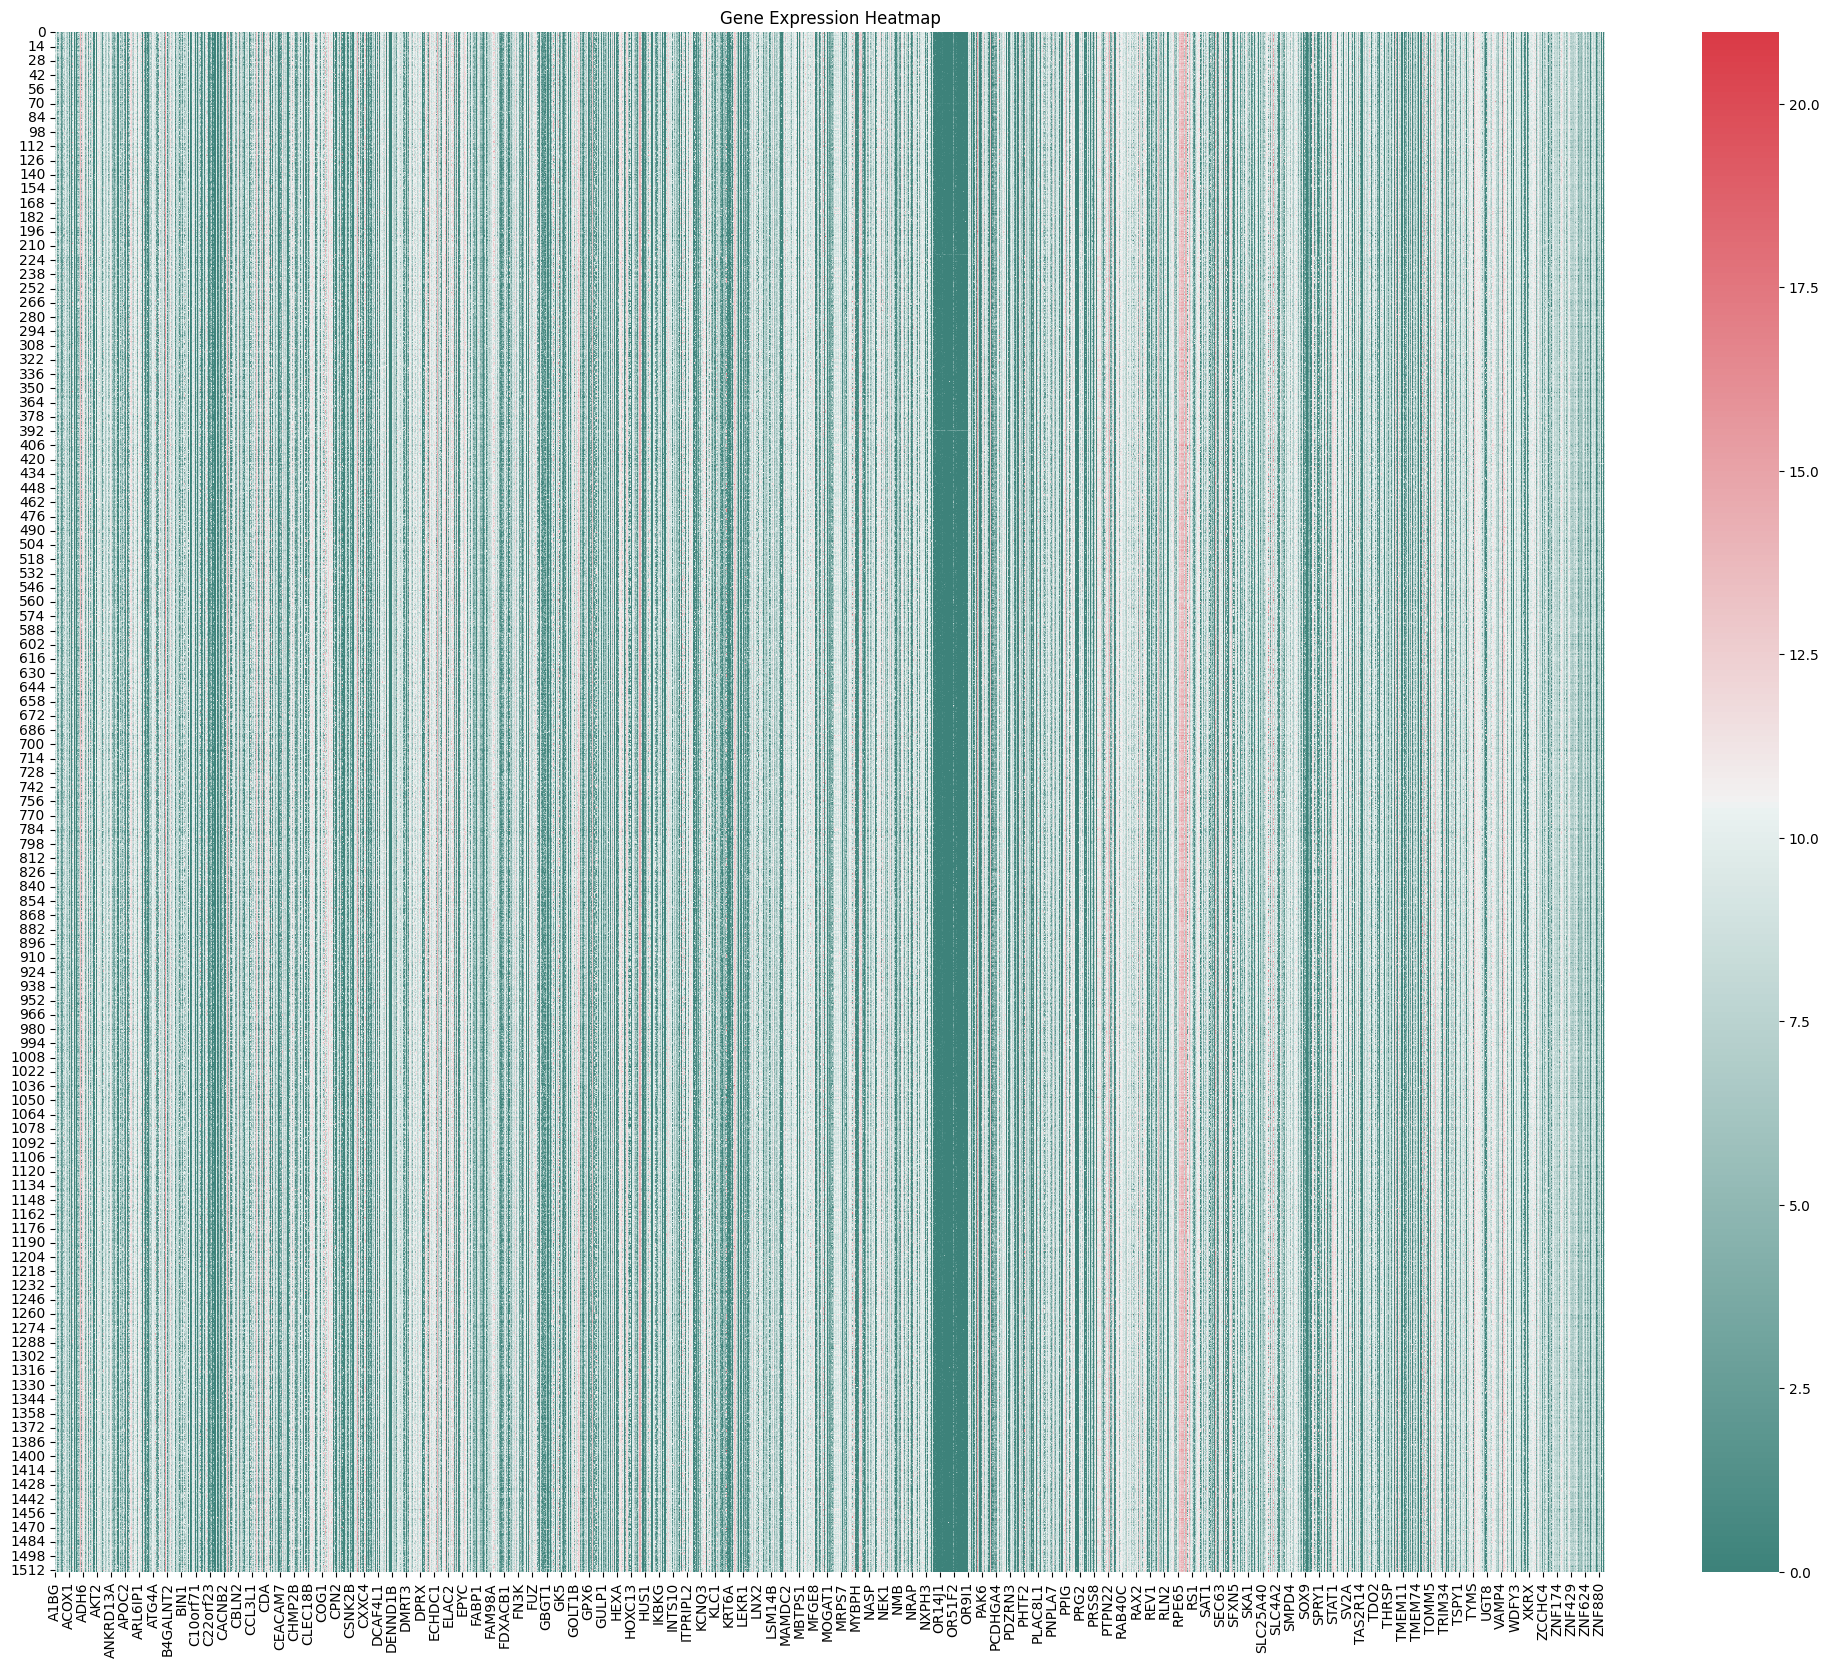

In [33]:
fig, axs = plt.subplots(figsize = (25, 20)) 
sns.heatmap(train_data_for_analysis, ax = axs, cmap = sns.diverging_palette(180, 10, as_cmap = True))
plt.title('Gene Expression Heatmap')

As there are 16K features it is too difficult to visulaization each feature's data distribution to get basic idea let's try to plot for 1st 12 features. 

Before that, Let's label encode our target column and concat to independent dataframe

In [36]:
from sklearn.preprocessing import LabelEncoder
# Assuming your target column is 'X_primary_disease' in your DataFrame
target_column = train_data_for_analysis_labels['X_primary_disease']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target column
target_labels = label_encoder.fit_transform(target_column)

set(target_labels)

{0, 1, 2}

In [37]:
# Print the mapping between categories and labels
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_mapping)

{'breast invasive carcinoma': 0, 'lung adenocarcinoma': 1, 'lung squamous cell carcinoma': 2}


In [38]:
train_data_for_analysis['X_primary_disease'] = target_labels
train_data_for_analysis.head()

A1BG  A1CF    A2M  A2ML1  A4GALT  A4GNT  AAAS   AACS  AADAC  AADACL2  ...  \
0  6.86  0.51  12.27  12.04    6.74   0.89  9.50  10.20   0.00      0.0  ...   
1  7.65  0.50  13.95   5.07    9.18   0.00  9.55   9.45   5.03      0.0  ...   
2  7.45  0.00  13.86   2.47    8.59   0.50  9.75   9.93   0.87      0.0  ...   
3  6.84  0.00  13.55   1.52    6.35   0.00  9.38   9.56   0.00      0.0  ...   
4  7.67  0.55  14.80   7.57    8.88   0.55  9.27  10.01   1.91      0.0  ...   

   ZWINT  ZXDA  ZXDB   ZXDC  ZYG11A  ZYG11B    ZYX  ZZEF1   ZZZ3  \
0   9.99  5.19  7.86  10.04    8.25    9.40  11.30  10.70   9.35   
1   9.30  5.51  8.26  10.06    5.70    9.34  12.98  10.21   9.39   
2   7.78  5.45  8.39   9.95    5.50    9.28  13.72  10.28   9.67   
3   8.28  6.70  9.46  10.71    6.78   10.62  11.14  10.79  10.42   
4  10.13  5.43  8.44   9.51    6.59    9.25  12.50   9.95   9.42   

   X_primary_disease  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  

[5 rows x 16341 columns]

In [39]:
train_data_for_analysis.isnull().sum().sort_values(ascending = False)

A1BG                 0
PRPSAP2              0
PRPF39               0
PRPF40A              0
PRPF40B              0
                    ..
GOLGA1               0
GOLGA2               0
GOLGA3               0
GOLGA4               0
X_primary_disease    0
Length: 16341, dtype: int64

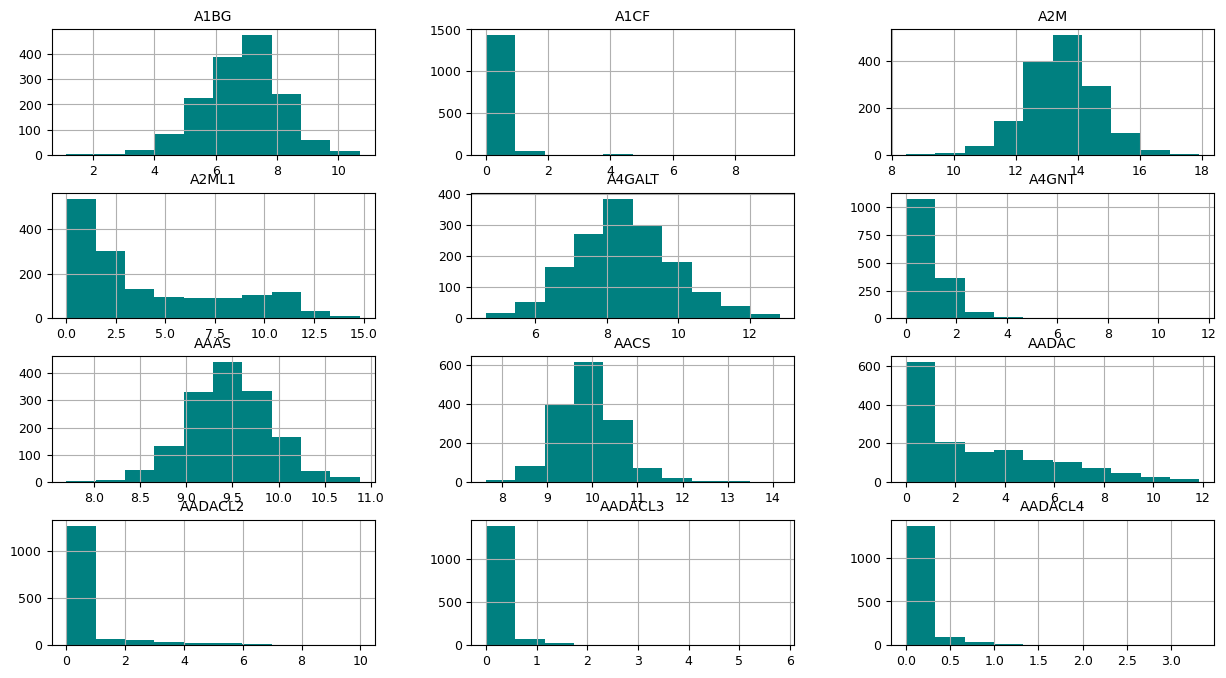

In [38]:
params = {'axes.titlesize':'10',
          'xtick.labelsize':'9',
          'ytick.labelsize':'9'}
matplotlib.rcParams.update(params)
#plt.subplots_adjust(hspace=0.5) 
train_data_for_analysis.drop(['X_primary_disease'], axis=1).iloc[:,:12].hist(figsize=(15,8), color='teal')
plt.show()

C:\Users\kiran.franklin\AppData\Local\Temp\ipykernel_38536\3908923400.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data_for_analysis[i][train_data_for_analysis['X_primary_disease']==0], color='g', label = 'breast invasive carcinoma')
C:\Users\kiran.franklin\AppData\Local\Temp\ipykernel_38536\3908923400.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://

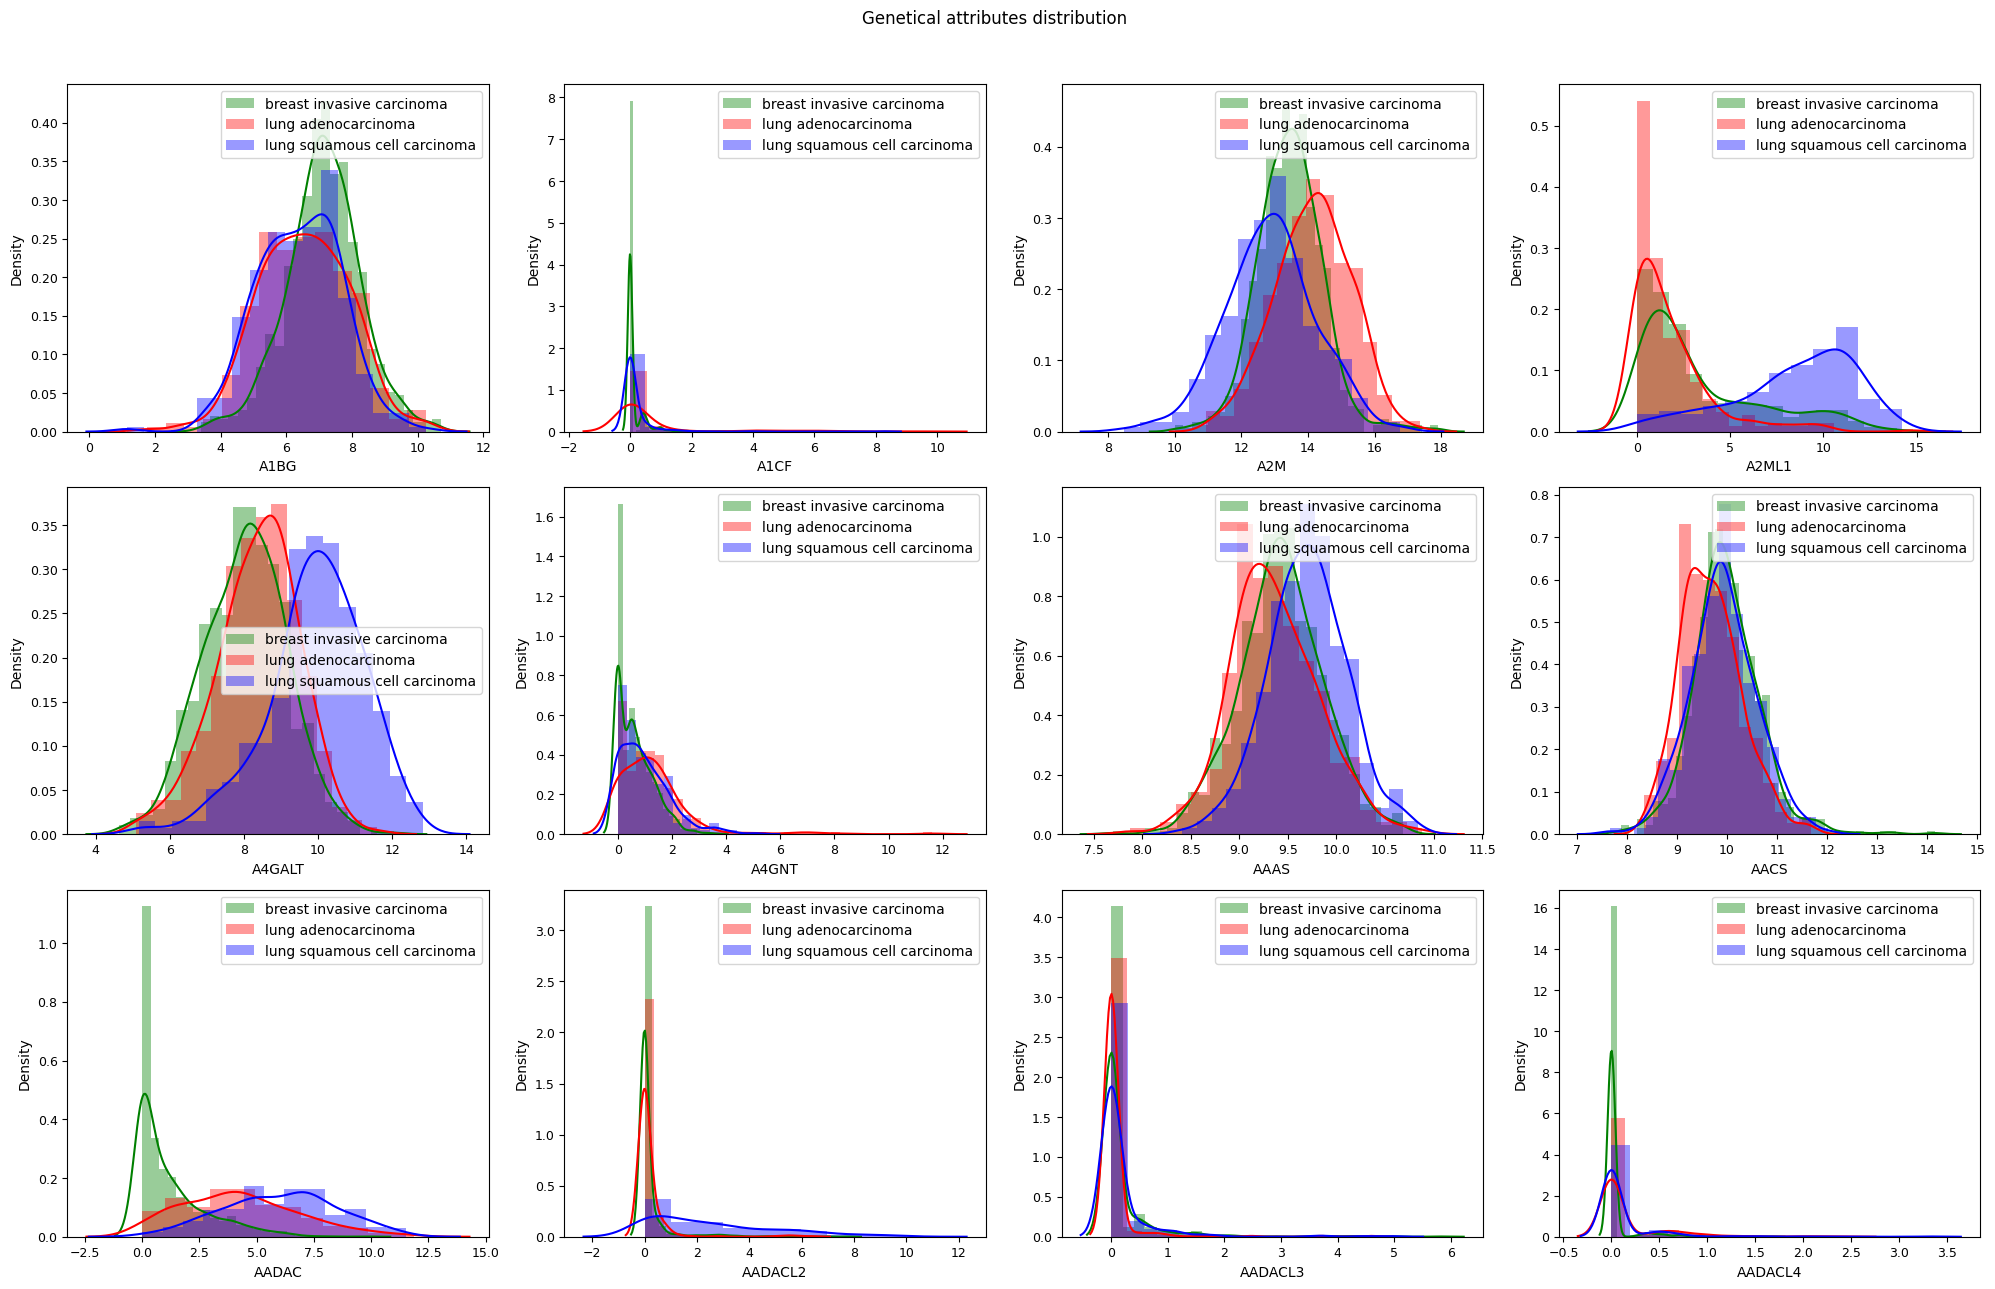

In [42]:
fig = plt.figure(figsize = (20, 25))
j = 0


for i in train_data_for_analysis.iloc[:,:12].columns:
    plt.subplot(6, 4, j+1)
    j += 1
    sns.distplot(train_data_for_analysis[i][train_data_for_analysis['X_primary_disease']==0], color='g', label = 'breast invasive carcinoma')
    sns.distplot(train_data_for_analysis[i][train_data_for_analysis['X_primary_disease']==1], color='r', label = 'lung adenocarcinoma')
    sns.distplot(train_data_for_analysis[i][train_data_for_analysis['X_primary_disease']==2], color='b', label = 'lung squamous cell carcinoma')
    plt.legend(loc='best')
fig.suptitle('Genetical attributes distribution')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

In [43]:
print('Maximum value possible in genetic / count data:', train_data_for_analysis.drop(['X_primary_disease'], axis = 1).max().max())
print('Minimum value possible in genetic / count data:', train_data_for_analysis.drop(['X_primary_disease'], axis = 1).min().min())

Maximum value possible in genetic / count data: 20.98
Minimum value possible in genetic / count data: 0.0


In [44]:
#Finding number of outliers in each column
Q1 = train_data_for_analysis.quantile(0.25)
Q3 = train_data_for_analysis.quantile(0.75)
IQR = Q3 - Q1
((train_data_for_analysis < (Q1 - 1.5 * IQR)) | (train_data_for_analysis > (Q3 + 1.5 * IQR))).sum().sort_values(ascending = False).head(10)

SERPINB12    378
TMEM89       376
CACNG8       375
GPR139       375
GPR78        375
LY6G6D       374
CSN3         374
C17orf98     374
KRT84        372
TAS2R60      370
dtype: int64

There are some outliers

Visualize Correlation of between the genetic Attributes and target variable

Text(0.5, 1.0, 'Histogram of Correlation of genes with the primary disease')

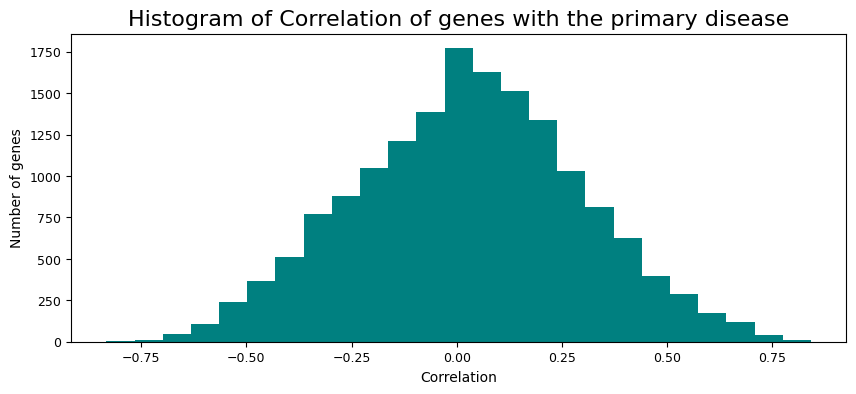

In [47]:
#how varied are genes and how well do they correlate with eventdeath?
fig, ax = plt.subplots(figsize=(10,4))

#plot histogram of variation using standard deviation as a measure
corrs=[]
for col in train_data_for_analysis.columns:
    corr = train_data_for_analysis[[col,'X_primary_disease']].corr()['X_primary_disease'][col]
    corrs.append(corr)

corrs.pop(-1)
ax.hist(corrs,  bins=25, color = 'teal')
ax.set_xlabel("Correlation")
ax.set_ylabel("Number of genes")
ax.set_title("Histogram of Correlation of genes with the primary disease", size=16)

In [50]:
#Max, min and mean of correlation
print("Maximum Correlation: " + "%.3f" %max(corrs))
print("Minimum Correlation: " + "%.3f" %min(corrs))

Maximum Correlation: 0.841
Minimum Correlation: -0.833


From above analysis we could see there few genes which have positive and negative correlation. Also, few good number doesn't have any correlation. 

For further analysis and modelling we can perform feature selection:

Feature selection, also known as variable selection, helps to reduce the dimensionality of the data while retaining the most relevant information for subsequent analysis.

## Common Feature Selection Methods:

* Filter methods: These methods evaluate the relevance of each feature (gene) individually using statistical measures like the t-test, chi-square test, Pearson correlation, or mutual information. Features with higher values of these measures are then selected.
* Wrapper methods: These methods evaluate subsets of features using a search algorithm and a machine learning model as a performance estimator. Examples of search algorithms include Recursive Feature Elimination (RFE) and sequential forward or backward selection.
* Embedded methods: These methods perform feature selection during the training process of a machine learning model using the intrinsic importance of the features. Examples of algorithms that perform embedded feature selection are LASSO (L1 regression) and decision trees (feature importance based on purity).
* Regularization methods: These methods incorporate regularization terms into the machine learning model, which can lead to implicit feature selection. Examples of these approaches include LASSO (L1) and Elastic Net (L1 and L2) regression.

Ref: https://www.mdpi.com/2306-5354/10/2/173

In our study let's use Lasso regression which most widely used feature selection while playing with gene expression data. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8329290/#CR24

In [40]:
# Let's save the data before performing feature selection
train_data_for_analysis.to_csv("train_data_for_analysis.csv",index=False)

In [2]:
train_data_for_analysis = pd.read_csv("train_data_for_analysis.csv")

In [3]:
train_data_for_analysis.isnull().sum().sort_values(ascending = False)

A1BG                 0
PRPSAP2              0
PRPF39               0
PRPF40A              0
PRPF40B              0
                    ..
GOLGA1               0
GOLGA2               0
GOLGA3               0
GOLGA4               0
X_primary_disease    0
Length: 16341, dtype: int64

In [4]:
train_data_for_analysis.head()

A1BG  A1CF    A2M  A2ML1  A4GALT  A4GNT  AAAS   AACS  AADAC  AADACL2  ...  \
0  6.86  0.51  12.27  12.04    6.74   0.89  9.50  10.20   0.00      0.0  ...   
1  7.65  0.50  13.95   5.07    9.18   0.00  9.55   9.45   5.03      0.0  ...   
2  7.45  0.00  13.86   2.47    8.59   0.50  9.75   9.93   0.87      0.0  ...   
3  6.84  0.00  13.55   1.52    6.35   0.00  9.38   9.56   0.00      0.0  ...   
4  7.67  0.55  14.80   7.57    8.88   0.55  9.27  10.01   1.91      0.0  ...   

   ZWINT  ZXDA  ZXDB   ZXDC  ZYG11A  ZYG11B    ZYX  ZZEF1   ZZZ3  \
0   9.99  5.19  7.86  10.04    8.25    9.40  11.30  10.70   9.35   
1   9.30  5.51  8.26  10.06    5.70    9.34  12.98  10.21   9.39   
2   7.78  5.45  8.39   9.95    5.50    9.28  13.72  10.28   9.67   
3   8.28  6.70  9.46  10.71    6.78   10.62  11.14  10.79  10.42   
4  10.13  5.43  8.44   9.51    6.59    9.25  12.50   9.95   9.42   

   X_primary_disease  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  

[5 rows x 16341 columns]

In [5]:
from sklearn.model_selection import train_test_split
X= train_data_for_analysis.drop(['X_primary_disease'], axis=1)
y = train_data_for_analysis['X_primary_disease']
print(X.shape,y.shape)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

(1514, 16340) (1514,)


In [6]:
y_train.value_counts().to_dict()

{0: 635, 2: 218, 1: 206}

In [7]:
 
y_train.value_counts().to_dict().values()


dict_values([635, 218, 206])

In [8]:
len(y_train)

1059

In [9]:
# Calculate total samples
total_samples = sum(y_train.value_counts().to_dict().values())

# Calculate percentages
percentages = [(count / total_samples) * 100 for count in y_train.value_counts().to_dict().values()]

In [10]:
percentages

[59.962228517469306, 20.585457979225687, 19.452313503305003]

In [11]:
from sklearn.linear_model import LassoCV
ls=LassoCV(cv=5)
ls.fit(X_train,y_train)
print(ls.coef_)

[-0.  0. -0. ... -0. -0.  0.]


c:\Users\kiran.franklin\Anaconda3\envs\pycaret\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.189e-01, tolerance: 6.888e-02
  model = cd_fast.enet_coordinate_descent(


In [13]:
ls.score(X_train,y_train)

0.9771606123754304

In [14]:
mask=ls.coef_!=0
X1=X.loc[:,mask]
X1.shape

(1514, 320)

In [15]:
selected_columns = []
for index, value in enumerate(mask):
    if value:
        selected_columns.append(train_data_for_analysis.columns[index])
selected_columns

['A2ML1',
 'ABCA12',
 'ACHE',
 'ADIPOQ',
 'ADRA2A',
 'AK5',
 'AKR1B15',
 'AKR7A3',
 'ALDH1A1',
 'ALDH1L1',
 'ALDH3A1',
 'ANKS1B',
 'ANPEP',
 'APOC2',
 'AZGP1',
 'BCL2L10',
 'BPI',
 'C10orf82',
 'C5orf46',
 'C7',
 'CA8',
 'CACNG4',
 'CALML3',
 'CCDC148',
 'CCDC60',
 'CCL8',
 'CD1E',
 'CD207',
 'CEL',
 'CHD5',
 'CLCA2',
 'CLDN10',
 'CLDN1',
 'CLDN3',
 'CLDN8',
 'CNGB3',
 'CNTN3',
 'COL17A1',
 'COL25A1',
 'COL4A5',
 'COL7A1',
 'COMP',
 'COX6B2',
 'CRABP2',
 'CSAG1',
 'CSF3',
 'CST1',
 'CST4',
 'CTNND2',
 'CXADR',
 'CXCL17',
 'CXCL6',
 'CYP26A1',
 'CYP27C1',
 'CYP2J2',
 'CYP4F22',
 'DDC',
 'DDX43',
 'DEFB4A',
 'DEGS2',
 'DIRAS1',
 'DLK1',
 'DLK2',
 'DLX2',
 'DLX6',
 'DMRT2',
 'DMRTA2',
 'DNAJC12',
 'DPP6',
 'DQX1',
 'ELAVL2',
 'ELF5',
 'ELFN2',
 'ELOVL3',
 'EN1',
 'ENPP1',
 'ENTPD3',
 'EPHA10',
 'ERBB4',
 'EREG',
 'EYA1',
 'F2RL2',
 'FABP4',
 'FAM163A',
 'FAM177B',
 'FAM83B',
 'FAM83E',
 'FGF3',
 'FOXA2',
 'FOXE1',
 'FOXJ1',
 'FOXN1',
 'FST',
 'FUT6',
 'FUT9',
 'GABRB3',
 'GABRG2',
 'GABRP

In [22]:
train_data_for_analysis.head()

A1BG  A1CF    A2M  A2ML1  A4GALT  A4GNT  AAAS   AACS  AADAC  AADACL2  ...  \
0  6.86  0.51  12.27  12.04    6.74   0.89  9.50  10.20   0.00      0.0  ...   
1  7.65  0.50  13.95   5.07    9.18   0.00  9.55   9.45   5.03      0.0  ...   
2  7.45  0.00  13.86   2.47    8.59   0.50  9.75   9.93   0.87      0.0  ...   
3  6.84  0.00  13.55   1.52    6.35   0.00  9.38   9.56   0.00      0.0  ...   
4  7.67  0.55  14.80   7.57    8.88   0.55  9.27  10.01   1.91      0.0  ...   

   ZWINT  ZXDA  ZXDB   ZXDC  ZYG11A  ZYG11B    ZYX  ZZEF1   ZZZ3  \
0   9.99  5.19  7.86  10.04    8.25    9.40  11.30  10.70   9.35   
1   9.30  5.51  8.26  10.06    5.70    9.34  12.98  10.21   9.39   
2   7.78  5.45  8.39   9.95    5.50    9.28  13.72  10.28   9.67   
3   8.28  6.70  9.46  10.71    6.78   10.62  11.14  10.79  10.42   
4  10.13  5.43  8.44   9.51    6.59    9.25  12.50   9.95   9.42   

   X_primary_disease  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  

[5 rows x 16341 columns]

In [24]:
selected_columns.append('X_primary_disease')
selected_columns

['A2ML1',
 'ABCA12',
 'ACHE',
 'ADIPOQ',
 'ADRA2A',
 'AK5',
 'AKR1B15',
 'AKR7A3',
 'ALDH1A1',
 'ALDH1L1',
 'ALDH3A1',
 'ANKS1B',
 'ANPEP',
 'APOC2',
 'AZGP1',
 'BCL2L10',
 'BPI',
 'C10orf82',
 'C5orf46',
 'C7',
 'CA8',
 'CACNG4',
 'CALML3',
 'CCDC148',
 'CCDC60',
 'CCL8',
 'CD1E',
 'CD207',
 'CEL',
 'CHD5',
 'CLCA2',
 'CLDN10',
 'CLDN1',
 'CLDN3',
 'CLDN8',
 'CNGB3',
 'CNTN3',
 'COL17A1',
 'COL25A1',
 'COL4A5',
 'COL7A1',
 'COMP',
 'COX6B2',
 'CRABP2',
 'CSAG1',
 'CSF3',
 'CST1',
 'CST4',
 'CTNND2',
 'CXADR',
 'CXCL17',
 'CXCL6',
 'CYP26A1',
 'CYP27C1',
 'CYP2J2',
 'CYP4F22',
 'DDC',
 'DDX43',
 'DEFB4A',
 'DEGS2',
 'DIRAS1',
 'DLK1',
 'DLK2',
 'DLX2',
 'DLX6',
 'DMRT2',
 'DMRTA2',
 'DNAJC12',
 'DPP6',
 'DQX1',
 'ELAVL2',
 'ELF5',
 'ELFN2',
 'ELOVL3',
 'EN1',
 'ENPP1',
 'ENTPD3',
 'EPHA10',
 'ERBB4',
 'EREG',
 'EYA1',
 'F2RL2',
 'FABP4',
 'FAM163A',
 'FAM177B',
 'FAM83B',
 'FAM83E',
 'FGF3',
 'FOXA2',
 'FOXE1',
 'FOXJ1',
 'FOXN1',
 'FST',
 'FUT6',
 'FUT9',
 'GABRB3',
 'GABRG2',
 'GABRP

In [26]:
train_data_feature_selected = train_data_for_analysis.loc[:,selected_columns]
train_data_feature_selected.head()

A2ML1  ABCA12  ACHE  ADIPOQ  ADRA2A   AK5  AKR1B15  AKR7A3  ALDH1A1  \
0  12.04    1.83  3.38    9.03    4.95  1.83     0.89    5.38     6.81   
1   5.07    9.41  4.96    8.41    9.63  7.05     6.60    6.51     9.90   
2   2.47    5.29  5.53    8.70    7.91  9.17     4.82   10.03     8.88   
3   1.52    7.63  2.53    9.11    8.86  7.27     3.66    7.20     9.49   
4   7.57    7.03  5.42    8.33    8.27  9.54     8.99    7.72     9.32   

   ALDH1L1  ...  WDR72  WFDC5   WT1    XK  XKRX  ZNF454  ZNF488  ZNHIT2  \
0     3.49  ...   0.51    0.0  2.00  7.64  4.59    5.96    6.82    7.58   
1     9.15  ...   6.12    0.5  6.94  3.14  3.00    3.33    2.10    8.57   
2     5.18  ...   3.91    0.5  3.15  5.71  2.93    4.33    3.21    8.72   
3     3.51  ...   7.62    0.0  5.94  2.83  2.83    4.65    2.53    5.74   
4     5.18  ...   3.97    0.0  0.55  4.17  3.88    4.34    5.03    7.93   

   ZSCAN23  X_primary_disease  
0     1.65                  0  
1     3.00                  0  
2     3.91                  0  
3     5.99                  0  
4     4.61                  0  

[5 rows x 321 columns]

In [27]:
train_data_feature_selected.to_csv("train_data_feature_selected.csv",index=False)

# Test data transformation

In [29]:
test_data = pd.read_csv("test_data.tsv",sep="\t")
test_data.head()

Unnamed: 0     S1  S1001  S1005  S1006  S1012  S1020  S1021  S1037  S1039  \
0       A1BG   7.60   6.84   6.12   5.86   6.05   5.62   6.00   5.74   6.71   
1       A1CF   0.53   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   
2        A2M  12.28  12.27  12.55  10.79  11.80   9.82  10.88  11.42  12.05   
3      A2ML1   9.02  11.08  13.00   8.50   8.46   6.18  14.59  10.08  10.11   
4     A4GALT  10.47   8.06  10.97  10.98   8.77   9.18  10.88  12.00   9.80   

   ...   S133  S1332  S1333  S1334  S1335  S1336  S1337  S1338   S134  S1342  
0  ...   8.22   6.77   7.62   6.73   5.66   6.11   6.90   7.95   6.03   5.89  
1  ...   0.00   0.00   0.00   1.07   0.32   0.00   0.00   0.00   0.00   0.00  
2  ...  11.97  14.42  11.95  12.91  13.77  12.96  13.87  13.20  13.75  13.11  
3  ...   0.98   0.59   0.53   7.20   9.76   5.54   5.76   0.98   0.38  10.73  
4  ...   9.00   9.44   5.67   7.46   6.74   7.07   9.28   7.74   7.28   5.53  

[5 rows x 601 columns]

In [30]:
test_data_transpose = test_data.T
test_data_transpose.head()

0     1      2      3       4      5     6      7      8      \
Unnamed: 0  A1BG  A1CF    A2M  A2ML1  A4GALT  A4GNT  AAAS   AACS  AADAC   
S1           7.6  0.53  12.28   9.02   10.47   1.69  9.77   9.69   5.66   
S1001       6.84   0.0  12.27  11.08    8.06   0.49   9.8    9.2  10.47   
S1005       6.12   0.0  12.55   13.0   10.97   2.16   9.5  10.62   7.22   
S1006       5.86   0.0  10.79    8.5   10.98    0.0  9.71   8.72   7.06   

              9      ...   16330  16331 16332 16333  16334   16335   16336  \
Unnamed: 0  AADACL2  ...  ZWILCH  ZWINT  ZXDA  ZXDB   ZXDC  ZYG11A  ZYG11B   
S1             3.43  ...    8.23   8.77  6.81  8.83  11.08     3.7    9.52   
S1001          9.78  ...    9.78   9.78  5.11  8.14  11.99    3.77     8.9   
S1005          2.64  ...    8.58   10.5  5.09  8.33  10.52    3.95   10.01   
S1006           0.0  ...    9.55  10.73  4.24  8.22  10.41    5.32    8.98   

            16337  16338  16339  
Unnamed: 0    ZYX  ZZEF1   ZZZ3  
S1          10.59  10.27  10.53  
S1001       11.79   9.81   9.52  
S1005       11.38  10.31   9.29  
S1006       12.91    9.9   9.59  

[5 rows x 16340 columns]

In [31]:
test_data_transpose.rename(columns=test_data_transpose.iloc[0],inplace = True)
test_data_transpose.head()

A1BG  A1CF    A2M  A2ML1  A4GALT  A4GNT  AAAS   AACS  AADAC  \
Unnamed: 0  A1BG  A1CF    A2M  A2ML1  A4GALT  A4GNT  AAAS   AACS  AADAC   
S1           7.6  0.53  12.28   9.02   10.47   1.69  9.77   9.69   5.66   
S1001       6.84   0.0  12.27  11.08    8.06   0.49   9.8    9.2  10.47   
S1005       6.12   0.0  12.55   13.0   10.97   2.16   9.5  10.62   7.22   
S1006       5.86   0.0  10.79    8.5   10.98    0.0  9.71   8.72   7.06   

            AADACL2  ...  ZWILCH  ZWINT  ZXDA  ZXDB   ZXDC  ZYG11A  ZYG11B  \
Unnamed: 0  AADACL2  ...  ZWILCH  ZWINT  ZXDA  ZXDB   ZXDC  ZYG11A  ZYG11B   
S1             3.43  ...    8.23   8.77  6.81  8.83  11.08     3.7    9.52   
S1001          9.78  ...    9.78   9.78  5.11  8.14  11.99    3.77     8.9   
S1005          2.64  ...    8.58   10.5  5.09  8.33  10.52    3.95   10.01   
S1006           0.0  ...    9.55  10.73  4.24  8.22  10.41    5.32    8.98   

              ZYX  ZZEF1   ZZZ3  
Unnamed: 0    ZYX  ZZEF1   ZZZ3  
S1          10.59  10.27  10.53  
S1001       11.79   9.81   9.52  
S1005       11.38  10.31   9.29  
S1006       12.91    9.9   9.59  

[5 rows x 16340 columns]

In [32]:
test_data_transpose.drop(test_data_transpose.index[0], inplace = True)
test_data_transpose.head()

A1BG  A1CF    A2M  A2ML1 A4GALT A4GNT   AAAS   AACS  AADAC AADACL2  \
S1      7.6  0.53  12.28   9.02  10.47  1.69   9.77   9.69   5.66    3.43   
S1001  6.84   0.0  12.27  11.08   8.06  0.49    9.8    9.2  10.47    9.78   
S1005  6.12   0.0  12.55   13.0  10.97  2.16    9.5  10.62   7.22    2.64   
S1006  5.86   0.0  10.79    8.5  10.98   0.0   9.71   8.72   7.06     0.0   
S1012  6.05   0.0   11.8   8.46   8.77   0.0  10.08  10.21   3.87     0.0   

       ... ZWILCH  ZWINT  ZXDA  ZXDB   ZXDC ZYG11A ZYG11B    ZYX  ZZEF1   ZZZ3  
S1     ...   8.23   8.77  6.81  8.83  11.08    3.7   9.52  10.59  10.27  10.53  
S1001  ...   9.78   9.78  5.11  8.14  11.99   3.77    8.9  11.79   9.81   9.52  
S1005  ...   8.58   10.5  5.09  8.33  10.52   3.95  10.01  11.38  10.31   9.29  
S1006  ...   9.55  10.73  4.24  8.22  10.41   5.32   8.98  12.91    9.9   9.59  
S1012  ...   8.51  10.17  6.43  8.93   10.7   7.26   9.71  11.55   9.98   9.86  

[5 rows x 16340 columns]

In [33]:
test_data_transpose.reset_index(inplace = True)
test_data_transpose.head()

index  A1BG  A1CF    A2M  A2ML1 A4GALT A4GNT   AAAS   AACS  AADAC  ...  \
0     S1   7.6  0.53  12.28   9.02  10.47  1.69   9.77   9.69   5.66  ...   
1  S1001  6.84   0.0  12.27  11.08   8.06  0.49    9.8    9.2  10.47  ...   
2  S1005  6.12   0.0  12.55   13.0  10.97  2.16    9.5  10.62   7.22  ...   
3  S1006  5.86   0.0  10.79    8.5  10.98   0.0   9.71   8.72   7.06  ...   
4  S1012  6.05   0.0   11.8   8.46   8.77   0.0  10.08  10.21   3.87  ...   

  ZWILCH  ZWINT  ZXDA  ZXDB   ZXDC ZYG11A ZYG11B    ZYX  ZZEF1   ZZZ3  
0   8.23   8.77  6.81  8.83  11.08    3.7   9.52  10.59  10.27  10.53  
1   9.78   9.78  5.11  8.14  11.99   3.77    8.9  11.79   9.81   9.52  
2   8.58   10.5  5.09  8.33  10.52   3.95  10.01  11.38  10.31   9.29  
3   9.55  10.73  4.24  8.22  10.41   5.32   8.98  12.91    9.9   9.59  
4   8.51  10.17  6.43  8.93   10.7   7.26   9.71  11.55   9.98   9.86  

[5 rows x 16341 columns]

In [34]:
test_data_transpose = test_data_transpose.drop('index',axis=1)
test_data_transpose.head()

A1BG  A1CF    A2M  A2ML1 A4GALT A4GNT   AAAS   AACS  AADAC AADACL2  ...  \
0   7.6  0.53  12.28   9.02  10.47  1.69   9.77   9.69   5.66    3.43  ...   
1  6.84   0.0  12.27  11.08   8.06  0.49    9.8    9.2  10.47    9.78  ...   
2  6.12   0.0  12.55   13.0  10.97  2.16    9.5  10.62   7.22    2.64  ...   
3  5.86   0.0  10.79    8.5  10.98   0.0   9.71   8.72   7.06     0.0  ...   
4  6.05   0.0   11.8   8.46   8.77   0.0  10.08  10.21   3.87     0.0  ...   

  ZWILCH  ZWINT  ZXDA  ZXDB   ZXDC ZYG11A ZYG11B    ZYX  ZZEF1   ZZZ3  
0   8.23   8.77  6.81  8.83  11.08    3.7   9.52  10.59  10.27  10.53  
1   9.78   9.78  5.11  8.14  11.99   3.77    8.9  11.79   9.81   9.52  
2   8.58   10.5  5.09  8.33  10.52   3.95  10.01  11.38  10.31   9.29  
3   9.55  10.73  4.24  8.22  10.41   5.32   8.98  12.91    9.9   9.59  
4   8.51  10.17  6.43  8.93   10.7   7.26   9.71  11.55   9.98   9.86  

[5 rows x 16340 columns]

Let's save only the feature which were selected from feature selection step

In [38]:
test_data_transpose = test_data_transpose.loc[:,selected_columns[:-1]]
test_data_transpose.head()

A2ML1 ABCA12  ACHE ADIPOQ ADRA2A   AK5 AKR1B15 AKR7A3 ALDH1A1 ALDH1L1  ...  \
0   9.02    9.6  2.32    0.0   4.69  2.04    4.88   2.66   13.39    5.81  ...   
1  11.08   8.88  7.23    0.0   4.34  0.49    2.35   5.06   11.75    5.26  ...   
2   13.0   9.08  6.71    0.0   5.72  2.88    6.32   3.84    9.47   10.71  ...   
3    8.5   7.78  9.65    0.0   4.28  1.37    6.23    4.5   10.03    8.21  ...   
4   8.46    4.7  8.97    0.0   4.93   0.0    0.93    4.0   10.19     4.8  ...   

  WDR49  WDR72 WFDC5   WT1    XK  XKRX ZNF454 ZNF488 ZNHIT2 ZSCAN23  
0  2.32  10.18  4.92  6.36  6.26  4.09   1.87   5.02   7.75    5.91  
1  3.82  11.25  7.33  1.15  7.49  4.45    4.5   7.21   7.49    6.24  
2  4.52  10.05  7.77   6.0  5.99  5.82   2.49   8.32   7.19    3.51  
3   0.0  10.87  5.38  2.98  7.29  3.32   1.04    7.7   7.44    1.37  
4  3.13   9.44  6.74  4.04   7.9  5.74   0.93   5.92   8.43    6.15  

[5 rows x 320 columns]

In [40]:
test_data_transpose.dtypes

A2ML1      object
ABCA12     object
ACHE       object
ADIPOQ     object
ADRA2A     object
            ...  
XKRX       object
ZNF454     object
ZNF488     object
ZNHIT2     object
ZSCAN23    object
Length: 320, dtype: object

In [43]:
with ThreadPoolExecutor(max_workers=8) as executor:
    test_data_transpose = test_data_transpose.applymap(convert_to_float)

In [44]:
test_data_transpose.dtypes

A2ML1      float64
ABCA12     float64
ACHE       float64
ADIPOQ     float64
ADRA2A     float64
            ...   
XKRX       float64
ZNF454     float64
ZNF488     float64
ZNHIT2     float64
ZSCAN23    float64
Length: 320, dtype: object

In [45]:
test_data_transpose.to_csv("test_data_transpose.csv",index=False)

Based on lasso regression we have reduced our feature from 16340 to 320, that a very good dimension reduction

Alternate method to perform the dimension reduction via PCA can be found below

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

Number of components = 2 and explained variance = 0.2445457357901607
Number of components = 4 and explained variance = 0.3365454746783939
Number of components = 6 and explained variance = 0.3975621051830758
Number of components = 10 and explained variance = 0.46092425642326934
Number of components = 16 and explained variance = 0.5127258358678537
Number of components = 20 and explained variance = 0.5363596137856035
Number of components = 30 and explained variance = 0.5772423322486522
Number of components = 50 and explained variance = 0.6285839078399356
Number of components = 100 and explained variance = 0.6998590216776353
Number of components = 150 and explained variance = 0.7436474025139438
Number of components = 200 and explained variance = 0.7743159762425468
Number of components = 300 and explained variance = 0.8209669810010056
Number of components = 450 and explained variance = 0.8699893594062176
Number of components = 600 and explained variance = 0.9055979669669111


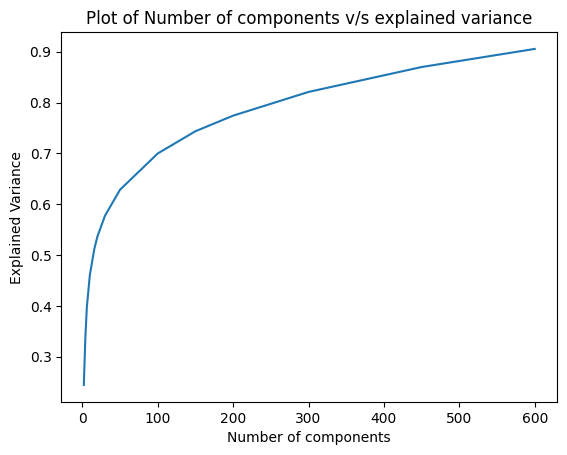

In [17]:
n_comp = [2,4,6,10 ,16,20,30,50,100,150,200,300,450,600] # list containing different values of components
explained = [] # explained variance ratio for each component of PCA
for x in n_comp:
    pca_gene = PCA(n_components=x)
    pca_gene.fit(train_data_for_analysis)
    explained.append(pca_gene.explained_variance_ratio_.sum())
    print("Number of components = %r and explained variance = %r"%(x,pca_gene.explained_variance_ratio_.sum()))
plt.plot(n_comp, explained)
plt.xlabel('Number of components')
plt.ylabel("Explained Variance")
plt.title("Plot of Number of components v/s explained variance")
plt.show()

At 500 we get satisfactory variance explaied of 90% this helps us reduce the dimensions from 16340 to 500 without lossing much information.
With these PCA transformed 500 data we can further perform modelling. 

But for study we goinig with Lasso regression method


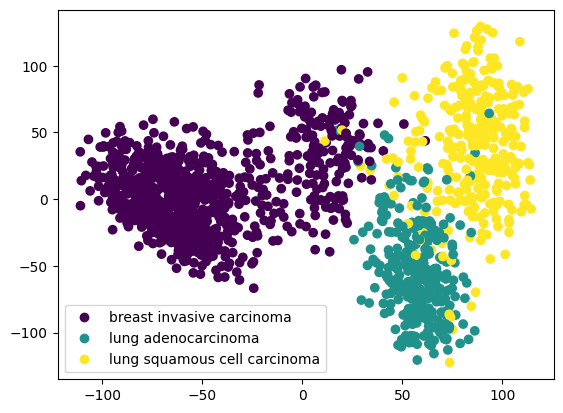

In [20]:
## Simple visulazation of data by reducing the dimension to 2D
pca = PCA(n_components=2)
Xt = pca.fit_transform(X)
plot = plt.scatter(Xt[:,0], Xt[:,1], c=train_data_for_analysis['X_primary_disease'])
plt.legend(handles=plot.legend_elements()[0], labels=['breast invasive carcinoma',  'lung adenocarcinoma','lung squamous cell carcinoma'])
plt.show()